In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Define the endpoint URL
data_url = "https://data.cityofchicago.org/resource/wrvz-psew.json"

# Read the data from the endpoint into a pandas DataFrame
taxi_data = pd.read_json(data_url)

# Display the first few rows of the DataFrame to verify
taxi_data.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,:@computed_region_vrxf_vc4k,pickup_census_tract,dropoff_census_tract
0,3d4ad7f2659a6f86fecfee4d4f3a8559716ca894,083b7260314e48be5e10a9191da36fb2c0974b91499a54...,2023-12-31T23:45:00.000,2023-12-31T23:45:00.000,0,0.00,28.0,28.0,3.25,0.0,...,Taxi Affiliation Services,41.874005,-87.663518,"{'type': 'Point', 'coordinates': [-87.66351754...",41.874005,-87.663518,"{'type': 'Point', 'coordinates': [-87.66351754...",29.0,NaN,NaN
1,327fa02e9cb1cc29e7898cf98830f6ade295f9e9,15ddbeeb791d41c7683b885617281c0b548544f189ee36...,2023-12-31T23:45:00.000,2024-01-01T00:00:00.000,1080,8.10,56.0,NaN,22.00,7.8,...,Taxi Affiliation Services,41.792592,-87.769615,"{'type': 'Point', 'coordinates': [-87.76961545...",NaN,NaN,NaN,53.0,NaN,NaN
2,6b1b21ca32da77c68ee5d8816194ac27d9206082,38f6145c9a2b848dc1baa16fd91087e606b12bcb8757a9...,2023-12-31T23:45:00.000,2024-01-01T00:00:00.000,1260,2.80,8.0,28.0,13.00,0.0,...,Taxi Affiliation Services,41.899602,-87.633308,"{'type': 'Point', 'coordinates': [-87.63330803...",41.874005,-87.663518,"{'type': 'Point', 'coordinates': [-87.66351754...",37.0,NaN,NaN
3,408dbbbbb5efe8825b9802e9e47b73bde2cad640,f29ed34900f8b339ab279eda0189ecae3312801dab967e...,2023-12-31T23:45:00.000,2024-01-01T00:15:00.000,1303,10.65,56.0,28.0,28.75,0.0,...,Sun Taxi,41.792592,-87.769615,"{'type': 'Point', 'coordinates': [-87.76961545...",41.874005,-87.663518,"{'type': 'Point', 'coordinates': [-87.66351754...",53.0,NaN,NaN
4,5bcabb19b28a7d07c1e114244476cba232dbfe78,171ec426eaf8f54c5acbb7e3fde8e0683bfa6042af0b00...,2023-12-31T23:45:00.000,2024-01-01T00:00:00.000,463,3.29,32.0,35.0,11.00,3.0,...,Flash Cab,41.878866,-87.625192,"{'type': 'Point', 'coordinates': [-87.62519214...",41.835118,-87.618678,"{'type': 'Point', 'coordinates': [-87.61867776...",38.0,NaN,NaN


**Install Ivy model**

In [3]:
pip install ivy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Cleaning the data and preprocessing it

In [7]:
# Assuming taxi_data is my DataFrame
# Convert timestamps to datetime objects
taxi_data['trip_start_timestamp'] = pd.to_datetime(taxi_data['trip_start_timestamp'])
taxi_data['trip_end_timestamp'] = pd.to_datetime(taxi_data['trip_end_timestamp'])

# If taxi_data is a subset of another DataFrame, create an independent copy first
taxi_data = taxi_data.copy()

# Directly fill missing values in the DataFrame without chaining
taxi_data['dropoff_community_area'] = taxi_data['dropoff_community_area'].fillna(-1)
taxi_data['pickup_census_tract'] = taxi_data['pickup_census_tract'].fillna(-1)

# Handle trips with zero duration or distance
# You might choose to remove these trips as they could be errors
taxi_data = taxi_data.loc[(taxi_data['trip_seconds'] > 0) & (taxi_data['trip_miles'] > 0)]


# EDA

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

# Assuming taxi_data is your cleaned DataFrame

# Summary Statistics for numerical columns
numerical_summary = taxi_data.describe()
print(numerical_summary)



                trip_start_timestamp             trip_end_timestamp  \
count                            875                            875   
mean   2023-12-31 22:39:06.171428608  2023-12-31 22:57:59.657142784   
min              2023-12-31 21:30:00            2023-12-31 21:30:00   
25%              2023-12-31 22:00:00            2023-12-31 22:15:00   
50%              2023-12-31 22:30:00            2023-12-31 23:00:00   
75%              2023-12-31 23:15:00            2023-12-31 23:30:00   
max              2023-12-31 23:45:00            2024-01-01 12:30:00   
std                              NaN                            NaN   

       trip_seconds  trip_miles  pickup_community_area  \
count    875.000000  875.000000             855.000000   
mean    1108.918857    5.412149              30.621053   
min        1.000000    0.010000               1.000000   
25%      480.000000    0.905000               8.000000   
50%      839.000000    2.380000              28.000000   
75%     1320

In [12]:
# Value counts for categorical columns
# Replace 'payment_type' and 'company' with actual categorical column names from your DataFrame
payment_type_counts = taxi_data['payment_type'].value_counts()
company_counts = taxi_data['company'].value_counts()
print(payment_type_counts)
print(company_counts)



payment_type
Cash           326
Credit Card    305
Mobile         164
Prcard          52
Unknown         28
Name: count, dtype: int64
company
Flash Cab                               164
Taxi Affiliation Services               135
Sun Taxi                                113
Taxicab Insurance Agency Llc             84
City Service                             81
Chicago Independents                     65
5 Star Taxi                              57
Medallion Leasin                         42
Globe Taxi                               40
Blue Ribbon Taxi Association             31
Star North Taxi Management Llc           13
Taxicab Insurance Agency, LLC            13
Choice Taxi Association                  11
Chicago City Taxi Association             7
Patriot Taxi Dba Peace Taxi Associat      6
Choice Taxi Association Inc               6
312 Medallion Management Corp             2
3591 - 63480 Chuks Cab                    2
Top Cab                                   1
U Taxicab             

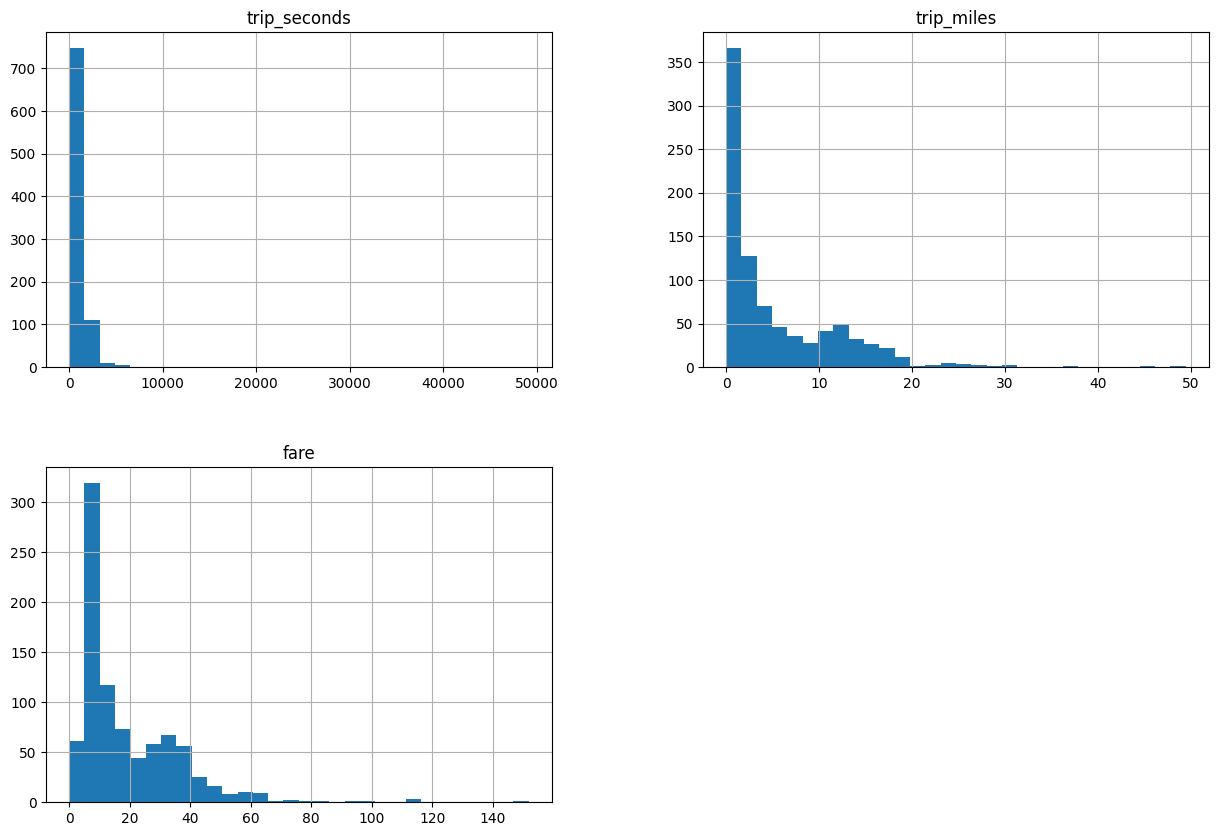

In [13]:
# Visualization of numerical features
# Replace 'trip_seconds', 'trip_miles', and 'fare' with actual numerical column names from your DataFrame
taxi_data[['trip_seconds', 'trip_miles', 'fare']].hist(bins=30, figsize=(15, 10))
plt.show()



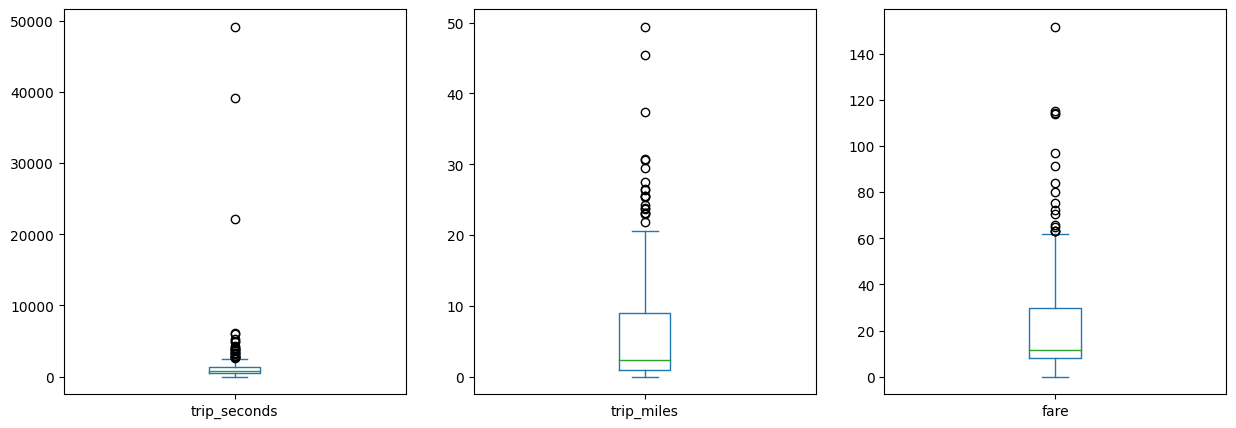

In [14]:
# Boxplots for numerical features
taxi_data[['trip_seconds', 'trip_miles', 'fare']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.show()



2023-12-31 21:30:00 2023-12-31 23:45:00


/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


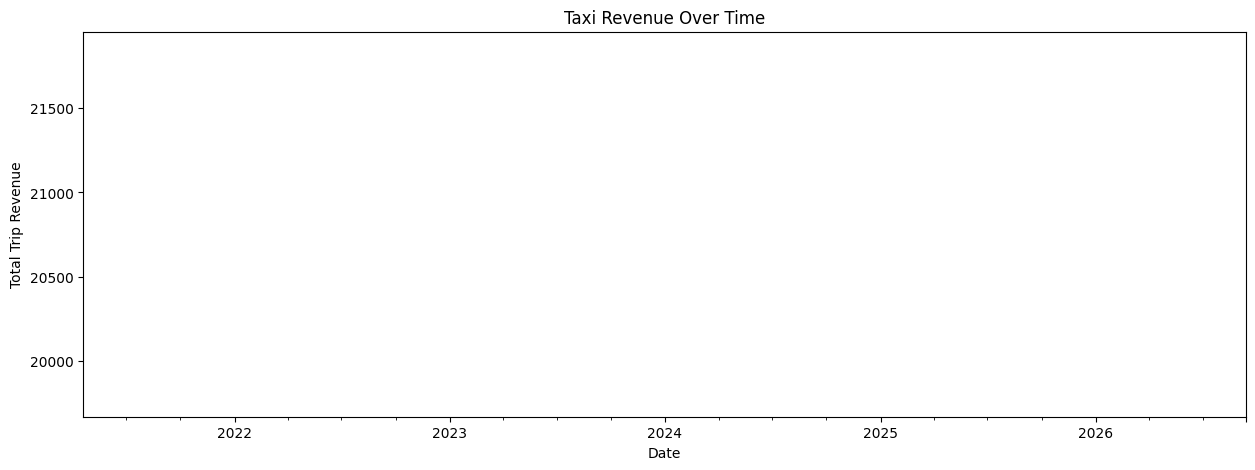

In [22]:
# Check if 'trip_start_timestamp' is a column in the DataFrame
if 'trip_start_timestamp' in taxi_data.columns:
    # Convert 'trip_start_timestamp' to datetime if not already done
    taxi_data['trip_start_timestamp'] = pd.to_datetime(taxi_data['trip_start_timestamp'])

    # Set 'trip_start_timestamp' as the index of the DataFrame
    taxi_data.set_index('trip_start_timestamp', inplace=True)

# Check the range of dates in the index
print(taxi_data.index.min(), taxi_data.index.max())

# If the range of dates is appropriate, plot the data
if taxi_data.index.min() != taxi_data.index.max():
    taxi_data['trip_total'].resample('D').sum().plot(figsize=(15, 5))
    plt.xlabel('Date')
    plt.ylabel('Total Trip Revenue')
    plt.title('Taxi Revenue Over Time')
    plt.show()
else:
    print("The dataset does not cover a range of dates.")

In [23]:
# Check if 'trip_start_timestamp' is the index
if isinstance(taxi_data.index, pd.DatetimeIndex):
    # The index is already a DatetimeIndex, proceed with plotting
    print("Index is already a DatetimeIndex.")
else:
    # The index is not a DatetimeIndex, handle accordingly
    print("Index is not a DatetimeIndex. Please set the correct datetime column as the index.")

Index is already a DatetimeIndex.


Date range: 2023-12-31 21:30:00 to 2023-12-31 23:45:00
Number of data points: 875
Number of NaN values in 'trip_total': 1
count    874.000000
mean      23.811259
std       20.914518
min        0.000000
25%       10.250000
50%       15.345000
75%       31.187500
max      224.700000
Name: trip_total, dtype: float64


/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


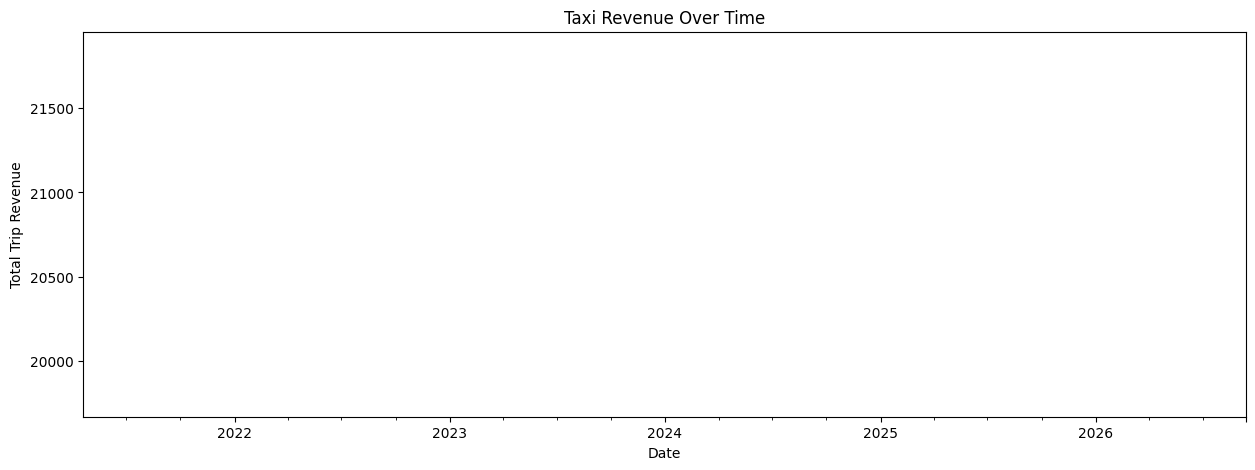

In [25]:
# Check the range of dates in the index
print("Date range:", taxi_data.index.min(), "to", taxi_data.index.max())

# Check for the number of data points
print("Number of data points:", len(taxi_data))

# Check for any NaN values in the 'trip_total' column
print("Number of NaN values in 'trip_total':", taxi_data['trip_total'].isna().sum())

# Summarize the 'trip_total' column to see if there are many zero values
print(taxi_data['trip_total'].describe())

# If the range of dates is appropriate, plot the data
if taxi_data.index.min() != taxi_data.index.max():
    # Resample by day and sum trip totals
    daily_totals = taxi_data['trip_total'].resample('D').sum()
    
    # Check if the resampled data is all zeros
    if daily_totals.sum() == 0:
        print("The resampled 'trip_total' data is all zeros.")
    else:
        daily_totals.plot(figsize=(15, 5))
        plt.xlabel('Date')
        plt.ylabel('Total Trip Revenue')
        plt.title('Taxi Revenue Over Time')
        plt.show()
else:
    print("The dataset does not cover a range of dates.")

/tmp/ipykernel_33/2159765067.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_totals = taxi_data['trip_total'].resample('H').sum()


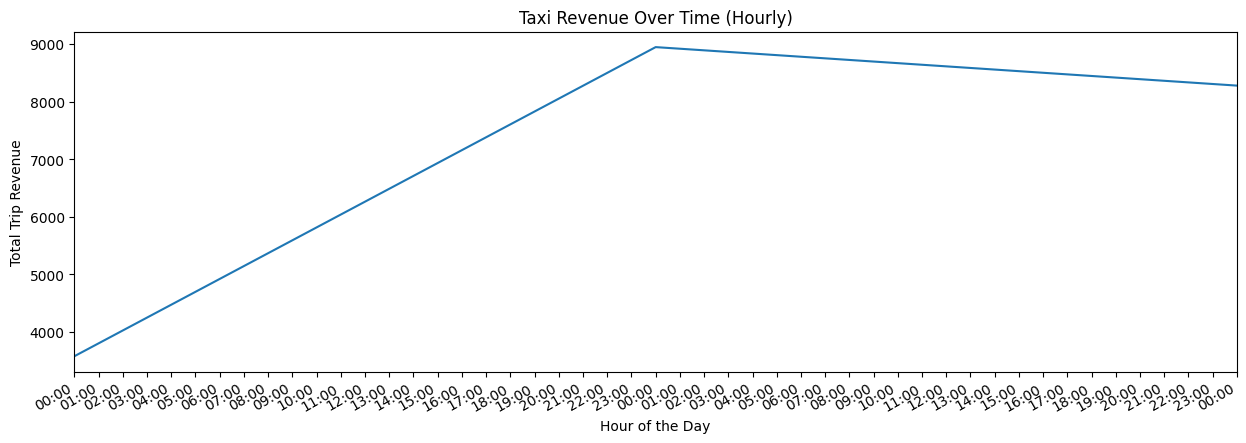

In [27]:
import matplotlib.dates as mdates

# Resample by hour and sum trip totals
hourly_totals = taxi_data['trip_total'].resample('H').sum()

# Plot the hourly data
fig, ax = plt.subplots(figsize=(15, 5))
hourly_totals.plot(ax=ax)

# Set major and minor ticks locator and formatter
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to hourly interval
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format major ticks as 'hour:minute'

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.xlabel('Hour of the Day')
plt.ylabel('Total Trip Revenue')
plt.title('Taxi Revenue Over Time (Hourly)')
plt.show()

# Further Analysis

**Loading events data from City of Chicago's API endpoint**

In [29]:
import pandas as pd
import requests

# Load the events data from the API endpoint
events_endpoint = 'https://data.cityofchicago.org/resource/pk66-w54g.json'
events_data = pd.read_json(events_endpoint)

# Display the first few rows to understand the structure
print(events_data.head())

              requestor_ organization  park_number  \
0           Mike Huberty           --          100   
1  Permit Holder Account           --          100   
2            Sara Hruska           --          228   
3  Permit Holder Account           --          100   
4  Permit Holder Account           --          100   

                    park_facility_name   reservation_start_date  \
0  Lincoln Promenade near Grant Statue  2024-12-31T00:00:00.000   
1           Lincoln Diamond Lawrence 1  2024-12-31T00:00:00.000   
2                Horner Picnic Grove 8  2024-12-31T00:00:00.000   
3           Lincoln Diamond Lawrence 5  2024-12-31T00:00:00.000   
4           Lincoln Diamond Lawrence 2  2024-12-31T00:00:00.000   

      reservation_end_date                                         event_type  \
0  2024-12-31T00:00:00.000                      Permit - Athletic T Cluster 3   
1  2024-12-31T00:00:00.000  Administrative Reservation - Internal Hold REV...   
2  2024-12-31T00:00:00.000   

# Preprocess Events data

In [30]:
# Convert 'reservation_start_date' and 'reservation_end_date' to datetime
events_data['reservation_start_date'] = pd.to_datetime(events_data['reservation_start_date'])
events_data['reservation_end_date'] = pd.to_datetime(events_data['reservation_end_date'])

# Filter for approved events
approved_events = events_data[events_data['permit_status'] == 'Approved']

# Assuming 'park_facility_name' can be mapped to a location in the taxi data
# You would need to create a mapping function or use geocoding if necessary
# For now, we'll assume 'park_facility_name' corresponds to a location in the taxi data

# Create a feature for event duration in hours
approved_events['event_duration_hours'] = (approved_events['reservation_end_date'] - approved_events['reservation_start_date']).dt.total_seconds() / 3600

# Check the processed events data
print(approved_events[['park_facility_name', 'reservation_start_date', 'reservation_end_date', 'event_type', 'event_duration_hours']].head())

                    park_facility_name reservation_start_date  \
0  Lincoln Promenade near Grant Statue             2024-12-31   
2                Horner Picnic Grove 8             2024-12-31   
5          Lincoln Ben Franklin Statue             2024-12-30   
6                Horner Picnic Grove 8             2024-12-30   
7     Lincoln Route on Lakefront Trail             2024-12-29   

  reservation_end_date                     event_type  event_duration_hours  
0           2024-12-31  Permit - Athletic T Cluster 3                   0.0  
2           2024-12-31  Permit - Athletic T Cluster 3                   0.0  
5           2024-12-30  Permit - Athletic T Cluster 3                   0.0  
6           2024-12-30  Permit - Athletic T Cluster 3                   0.0  
7           2024-12-29  Permit - Athletic T Cluster 3                   0.0  


/tmp/ipykernel_33/2683899113.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_events['event_duration_hours'] = (approved_events['reservation_end_date'] - approved_events['reservation_start_date']).dt.total_seconds() / 3600


In [31]:
# Create a copy of the filtered DataFrame to avoid the SettingWithCopyWarning
approved_events = events_data[events_data['permit_status'] == 'Approved'].copy()

# Convert 'reservation_start_date' and 'reservation_end_date' to datetime
approved_events['reservation_start_date'] = pd.to_datetime(approved_events['reservation_start_date'])
approved_events['reservation_end_date'] = pd.to_datetime(approved_events['reservation_end_date'])

# Calculate the event duration in hours
approved_events['event_duration_hours'] = (approved_events['reservation_end_date'] - approved_events['reservation_start_date']).dt.total_seconds() / 3600

# Handle events with zero duration
# You might want to assign a default duration or further investigate these cases
default_duration_hours = 4  # Example default duration
approved_events['event_duration_hours'] = approved_events['event_duration_hours'].replace(0, default_duration_hours)

# Check the processed events data
print(approved_events[['park_facility_name', 'reservation_start_date', 'reservation_end_date', 'event_type', 'event_duration_hours']].head())

                    park_facility_name reservation_start_date  \
0  Lincoln Promenade near Grant Statue             2024-12-31   
2                Horner Picnic Grove 8             2024-12-31   
5          Lincoln Ben Franklin Statue             2024-12-30   
6                Horner Picnic Grove 8             2024-12-30   
7     Lincoln Route on Lakefront Trail             2024-12-29   

  reservation_end_date                     event_type  event_duration_hours  
0           2024-12-31  Permit - Athletic T Cluster 3                   4.0  
2           2024-12-31  Permit - Athletic T Cluster 3                   4.0  
5           2024-12-30  Permit - Athletic T Cluster 3                   4.0  
6           2024-12-30  Permit - Athletic T Cluster 3                   4.0  
7           2024-12-29  Permit - Athletic T Cluster 3                   4.0  


In [33]:
print(taxi_data.columns)

Index(['trip_id', 'taxi_id', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'fare',
       'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location',
       ':@computed_region_vrxf_vc4k', 'pickup_census_tract',
       'dropoff_census_tract'],
      dtype='object')


In [34]:
import geopandas as gpd

# Convert taxi trip pickup locations to a GeoDataFrame
gdf_taxi = gpd.GeoDataFrame(
    taxi_data, 
    geometry=gpd.points_from_xy(taxi_data['pickup_centroid_longitude'], taxi_data['pickup_centroid_latitude']),
    crs="EPSG:4326"  # WGS 84 latitude-longitude projection
)

In [37]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming we have a function to get the latitude and longitude for each event location
# For this example, we'll use placeholder coordinates for Chicago's centroid
def get_event_location(park_facility_name):
    # Replace with actual logic to get the location
    # Example coordinates for Chicago's centroid
    return (41.881832, -87.623177)

# Apply the function to get the location of each event
approved_events['location'] = approved_events['park_facility_name'].apply(get_event_location)
approved_events['geometry'] = approved_events['location'].apply(lambda loc: Point(loc[1], loc[0]))
gdf_events = gpd.GeoDataFrame(approved_events, geometry='geometry', crs="EPSG:4326")



In [38]:
import geopandas as gpd
from shapely.geometry import Point

# ... (other parts of the code remain unchanged)

# Define a function to check if a taxi trip occurred near any event
def is_near_event(trip_location, events_gdf, threshold_distance_km):
    # Buffer the trip point by the threshold distance (in degrees)
    # Note: This is a rough conversion; for more accuracy, consider using a UTM projection
    buffer_degrees = threshold_distance_km / 111  # Rough conversion of km to degrees
    trip_point_buffered = trip_location.buffer(buffer_degrees)
    
    # Create a GeoDataFrame for the buffered trip point
    gdf_trip_point = gpd.GeoDataFrame(geometry=[trip_point_buffered], crs="EPSG:4326")
    
    # Use spatial join to find events within the buffer
    # Update the 'op' parameter to 'predicate' to address the deprecation warning
    nearby_events = gpd.sjoin(events_gdf, gdf_trip_point, how='inner', predicate='intersects')
    
    # Check if there are any nearby events
    return not nearby_events.empty

# ... (rest of the code remains unchanged)

In [40]:

# Define a threshold distance (in kilometers) for considering a trip to be influenced by an event
threshold_distance_km = 5  # Example threshold distance in kilometers

# Calculate if each taxi trip was near an event
gdf_taxi['near_event'] = gdf_taxi['geometry'].apply(lambda x: is_near_event(x, gdf_events, threshold_distance_km))

# Now you can include 'near_event' in your predictive model

# Incorporate Event Proximity Feature

We have created a feature `near_event` that indicates whether a taxi trip was near an event. Now, we will include this feature in our dataset that will be used for training the predictive model.

In [41]:
# Assuming 'near_event' is a binary feature indicating proximity to an event
# Include this feature in the dataset
taxi_data['near_event'] = gdf_taxi['near_event']

# Prepare the Dataset for Modeling

Next, we will split our dataset into features (X) and the target variable (y), and then into training and testing sets. This will prepare our data for the modeling process.

In [42]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
y = taxi_data['trip_total']  # Target variable: total fare of the trip
X = taxi_data.drop(['trip_total', 'trip_id', 'taxi_id'], axis=1)  # Features: all other columns except identifiers and target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
pip install tensorflow  # or torch, jax, etc.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Assuming 'pickup_centroid_latitude' and 'pickup_centroid_longitude' are the correct column names
# and 'trip_start_timestamp' is the name of the column with datetime information in the original 'taxi_data' DataFrame

# First, extract datetime features from the original 'taxi_data' DataFrame
taxi_data['hour_of_day'] = taxi_data['trip_start_timestamp'].dt.hour
taxi_data['day_of_week'] = taxi_data['trip_start_timestamp'].dt.dayofweek

# Now, create the features DataFrame 'X' by dropping the target variable and other columns not used as features
X = taxi_data.drop(['trip_total', 'trip_id', 'taxi_id', 'trip_start_timestamp'], axis=1)  # Drop the original datetime column after feature extraction

# Define the target variable 'y'
y = taxi_data['trip_total']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'trip_start_timestamp'

In [48]:
# Check if 'trip_end_timestamp' is the correct datetime column to use
print(taxi_data['trip_end_timestamp'].head())



trip_start_timestamp
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:15:00
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:15:00
Name: trip_end_timestamp, dtype: datetime64[ns]


In [54]:
# Check if 'trip_end_timestamp' is the correct datetime column to use
print(taxi_data['trip_end_timestamp'].head())

# Identify categorical columns in the DataFrame
# Let's assume 'payment_type' and 'company' are the categorical columns
categorical_columns = ['payment_type', 'company']

# Apply one-hot encoding to the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now, split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convert the pandas DataFrame to Ivy arrays
X_train_ivy = ivy.array(X_train.values.astype(np.float32))
y_train_ivy = ivy.array(y_train.values.astype(np.float32))
X_test_ivy = ivy.array(X_test.values.astype(np.float32))
y_test_ivy = ivy.array(y_test.values.astype(np.float32))

trip_start_timestamp
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:15:00
2023-12-31 23:45:00   2024-01-01 00:00:00
2023-12-31 23:45:00   2024-01-01 00:15:00
Name: trip_end_timestamp, dtype: datetime64[ns]


TypeError: float() argument must be a string or a real number, not 'dict'

In [55]:
print(X_train.dtypes)

trip_seconds                                      int64
trip_miles                                      float64
pickup_community_area                           float64
dropoff_community_area                          float64
fare                                            float64
tips                                            float64
tolls                                           float64
extras                                          float64
pickup_centroid_latitude                        float64
pickup_centroid_longitude                       float64
pickup_centroid_location                         object
dropoff_centroid_latitude                       float64
dropoff_centroid_longitude                      float64
dropoff_centroid_location                        object
:@computed_region_vrxf_vc4k                     float64
pickup_census_tract                             float64
dropoff_census_tract                            float64
near_event                                      

In [60]:
# Drop the 'object' type columns if they exist
if 'pickup_centroid_location' in X_train.columns:
    X_train = X_train.drop(['pickup_centroid_location'], axis=1)
if 'dropoff_centroid_location' in X_train.columns:
    X_train = X_train.drop(['dropoff_centroid_location'], axis=1)

if 'pickup_centroid_location' in X_test.columns:
    X_test = X_test.drop(['pickup_centroid_location'], axis=1)
if 'dropoff_centroid_location' in X_test.columns:
    X_test = X_test.drop(['dropoff_centroid_location'], axis=1)

# Now convert the pandas DataFrame to Ivy arrays
X_train_ivy = ivy.array(X_train.values.astype(np.float32))
y_train_ivy = ivy.array(y_train.values.astype(np.float32))
X_test_ivy = ivy.array(X_test.values.astype(np.float32))
y_test_ivy = ivy.array(y_test.values.astype(np.float32))



In [74]:
pip install --upgrade ivy

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install tensorflow==1.15  # Or another older compatible version

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==1.15
Note: you may need to restart the kernel to use updated packages.


In [96]:
import ivy

# Define a simple linear regression model using Ivy
class LinearRegressionModel(ivy.Module):
    def __init__(self, input_size, output_size=1):
        # Initialize the parent module
        super().__init__()
        # Initialize weights and bias with random values
        self.v = ivy.Container({
            'weights': ivy.variable(ivy.random_uniform(shape=(input_size, output_size), minval=-0.1, maxval=0.1)),
            'bias': ivy.variable(ivy.zeros(shape=(output_size,)))
        })

    def _forward(self, x):
        # Forward pass: compute the linear combination of inputs and weights
        return ivy.matmul(x, self.v.weights) + self.v.bias

# Set the backend for Ivy
ivy.set_backend('tensorflow')  # Replace with your chosen backend

# Initialize the Ivy model
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)

# ... rest of the code for data conversion, training loop, and evaluation ...

# Convert the pandas DataFrame to Ivy arrays
X_train_ivy = ivy.array(X_train.values.astype(np.float32))
y_train_ivy = ivy.array(y_train.values.reshape(-1, 1).astype(np.float32))  # Reshape for consistency with output
X_test_ivy = ivy.array(X_test.values.astype(np.float32))
y_test_ivy = ivy.array(y_test.values.reshape(-1, 1).astype(np.float32))

# Define a function to compute the mean squared error using Ivy
def compute_mse(y_true, y_pred):
    return ivy.mean(ivy.square(y_true - y_pred))

# Define the optimizer using Ivy's native SGD optimizer
optimizer = ivy.optimizers.SGD(learning_rate=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train_ivy)
    
    # Compute loss
    loss = compute_mse(y_train_ivy, y_pred)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the model
y_pred_test = model(X_test_ivy)
test_loss = compute_mse(y_test_ivy, y_pred_test)
print(f"Test Loss: {test_loss.item()}")

AttributeError: module 'ivy.functional.backends.tensorflow' has no attribute 'variable'

In [78]:
import tensorflow as tf
print(tf.__version__) 


2.15.0


In [79]:
import ivy
print(ivy.__version__)


0.0.9.0
